In [1]:
import numpy as np
import pandas as pd
import multiprocessing as mp
from inspect import signature
from matplotlib import pyplot as plt
from plotting import plot_performance_over_time, plot_final_performance_comparison, plot_improvement_probability, plot_configuration_footprint, plot_hp_importance, plot_deepcave

In [2]:
# Let's generate some exmaple data fist:
df = pd.DataFrame(np.random.randint(0,4,size=(500, 6)), columns=["time", "performance", "Method", "Benchmark", "Dimension", "seed"])
print(df)

     time  performance  Method  Benchmark  Dimension  seed
0       0            0       2          1          1     1
1       3            2       3          2          3     1
2       2            3       3          2          0     0
3       1            1       0          1          2     0
4       2            1       2          1          0     2
..    ...          ...     ...        ...        ...   ...
495     2            3       2          0          0     1
496     1            1       0          1          1     1
497     2            3       3          1          1     2
498     3            0       0          2          3     2
499     2            1       3          1          1     1

[500 rows x 6 columns]


## The Basics

These are the standard plotting functions we implement:
    - performance over time plots
    - configuration footprints with deepcave
    - hyperparameter iportance with deepcave
    - final performance comparison plots with rliable

Below you see them in action with randomly generated data.

/home/micha/Studium/BA_new/BA-Parameter-Free-DAC/ba_parameter_free_dac/plotting/plotting.py:207: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.lineplot(data=data, x=x, y=y, ax=ax, marker=marker, hue=hue, errorbar=errorbar, estimator=aggregation,palette=palette if palette is not None else sns.color_palette('colorblind', as_cmap = True))
/home/micha/anaconda3/envs/PFDAC/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/micha/anaconda3/envs/PFDAC/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


This is the full set of arguments:


<Signature (data: pandas.core.frame.DataFrame, x: str, y: str, hue: str = None, marker: str = None, col: str = None, row: str = None, col_wrap: int = None, sharey: bool = True, logx: bool = False, logy: bool = False, xlim: Tuple = None, ylim: Tuple = None, aspect: float = 1.0, errorbar: str = 'ci', xlabel: str = None, ylabel: str = None, aggregation: str = <function mean at 0x7fa65850b010>, palette=None, save_path: str = None, figsize=None, title: str = None)>

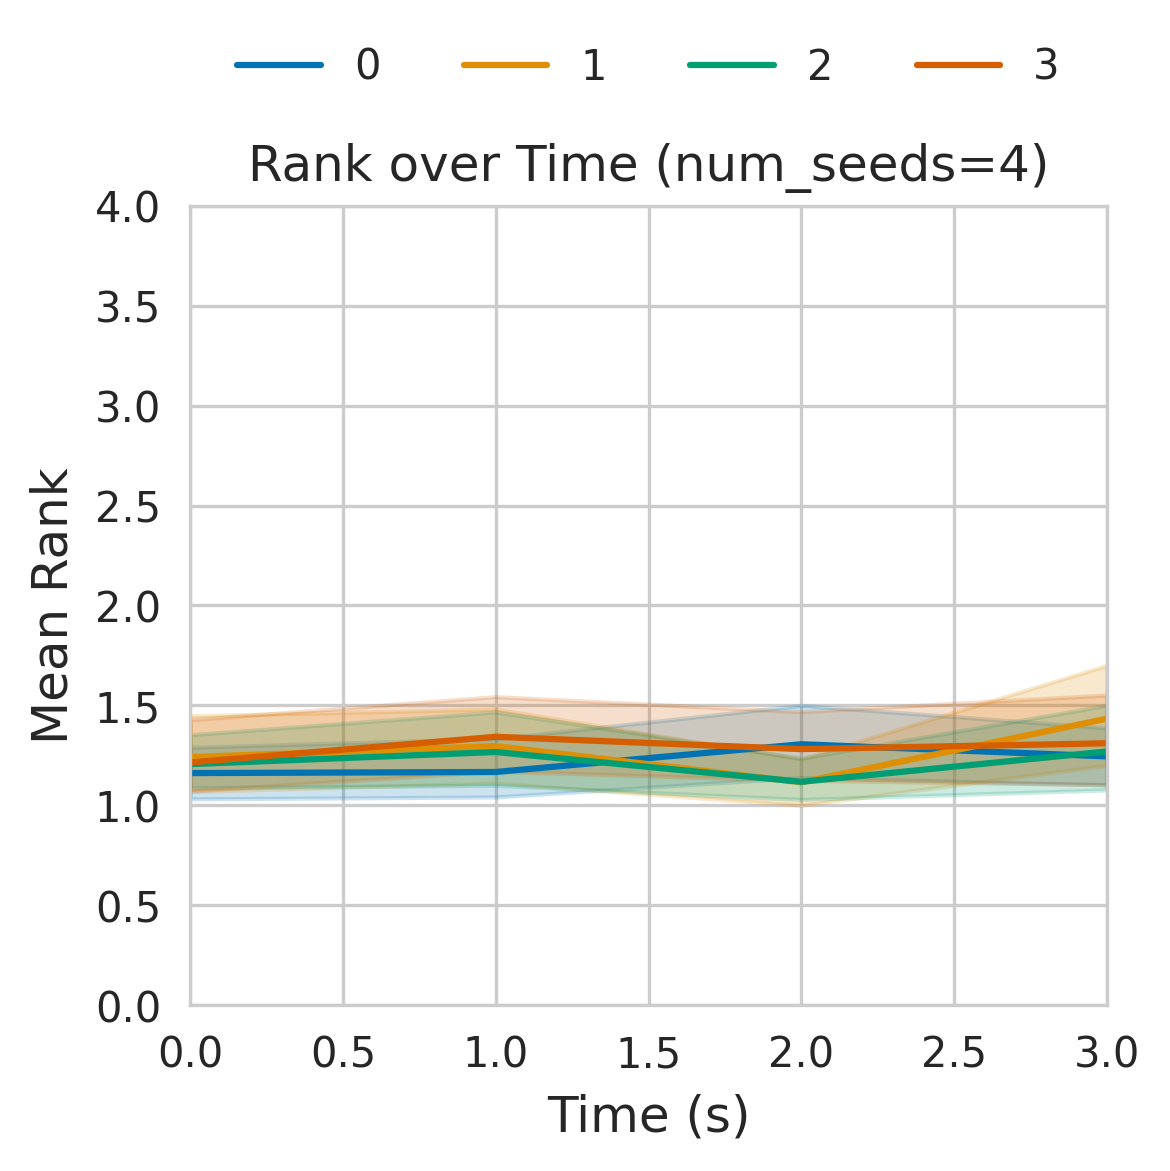

In [3]:
# First: simple performance over time
# You have different options for aggregation (mean, median, iqm and rank) and confidence interval (std, ci, se)
plot_performance_over_time(df, x="time", y="performance", hue="Method", aggregation="rank", logx=False, xlabel="Time (s)", ylabel="Mean Rank", ylim=(0,4))

print("This is the full set of arguments:")
signature(plot_performance_over_time)

Three performance metrics aggregated over all seeds


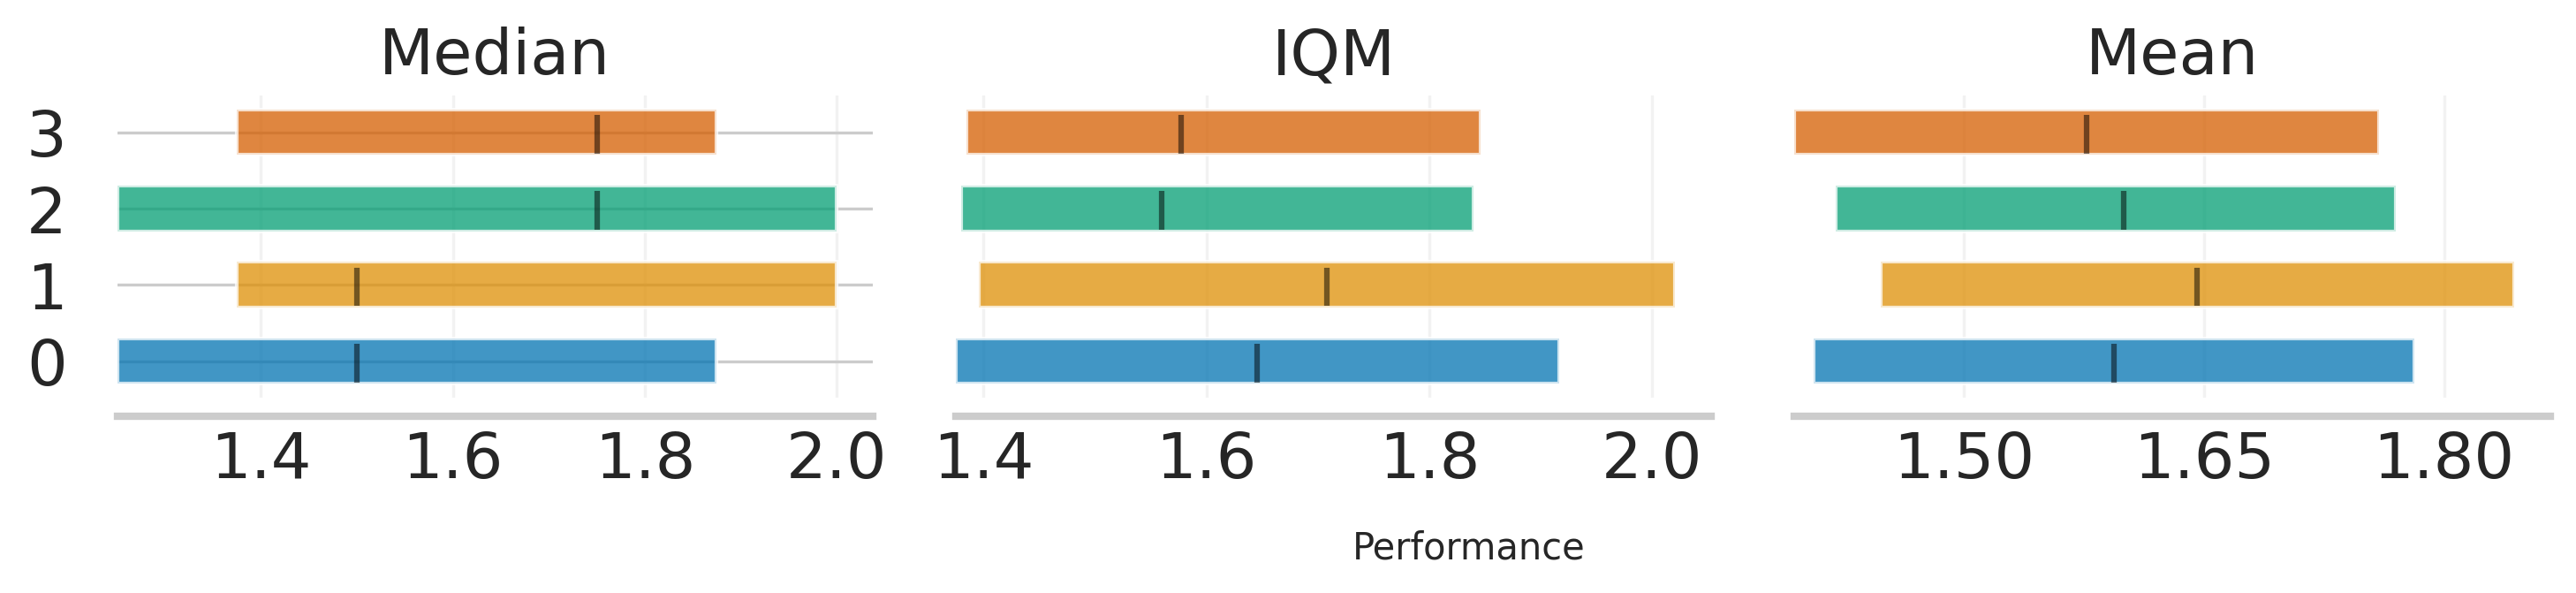

In [7]:
# If you only want a comparison of final performance, you can specify which metrics to aggregate over and get a result like this:
plot_final_performance_comparison(df, x="Method", y="performance", aggregation=["mean", "median", "iqm"], xlabel="Performance")
print("Three performance metrics aggregated over all seeds")

This obviously is better for fewer methods.


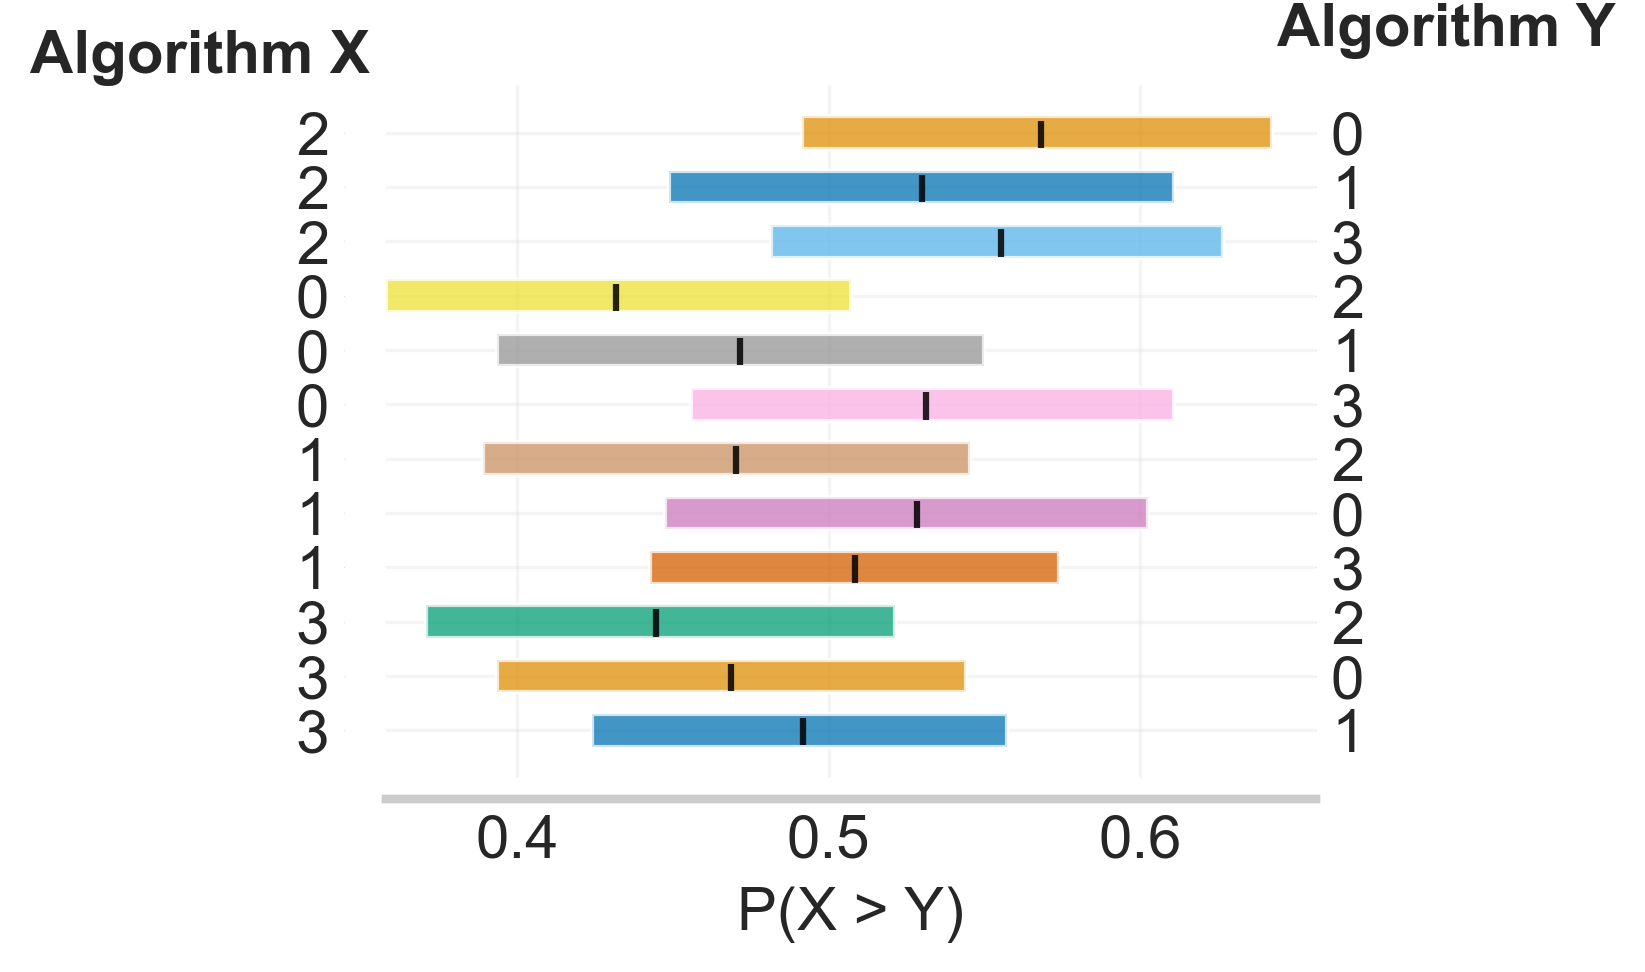

In [5]:
# Similarly, you can also plot the probability that one method will outperform another at the end of your evaluation:
plot_improvement_probability(df, x="Method", y="performance")
print("This obviously is better for fewer methods.")

In [6]:
# If you want to plot the configuration footprint, you can do so like this:
imgs = plot_configuration_footprint(run_path="example_run")
for img in imgs:
    plt.imshow(img)
    plt.axis('off')
    plt.show()

deepcave.utils.styled_plot (WARNING): LaTeX not found. Using default font.
{'objective_id': 0, 'details': True, 'budget_id': 3, 'show_supports': True, 'show_borders': True}


100%|██████████| 100/100 [00:00<00:00, 3088.32it/s]

deepcave.evaluators.footprint (INFO): Added 100 configurations.
deepcave.evaluators.footprint (INFO): Starting to calculate distances and add border and random configurations...
deepcave.evaluators.footprint (INFO): Found 200 configurations...


deepcave.evaluators.footprint (INFO): Found 300 configurations...
deepcave.evaluators.footprint (INFO): Added 8 border configs and 239 random configs.
deepcave.evaluators.footprint (INFO): Total configurations: 347.
deepcave.evaluators.footprint (INFO): Getting MDS data...


/Users/theeimer/anaconda3/envs/test_deepcave/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


deepcave.evaluators.footprint (INFO): Training on objective...
deepcave.evaluators.footprint (INFO): Training on area...


/var/folders/yc/_2wjgdhd4px91396bq5wm7kr0000gn/T/ipykernel_67401/1795787224.py:6: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



In [7]:
# And the function for hyperparameter importance looks very similar:
hp_names = ["alpha", "beta", "gamma"]
img = plot_hp_importance(hp_names, run_path="example_run")
plt.imshow(img)
plt.axis('off')
plt.show()

{'objective_id': 0, 'n_trees': 10, 'n_hps': 10, 'method': 'global', 'hyperparameter_names': ['alpha', 'beta', 'gamma'], 'budget_ids': [0, 1, 2, 3]}


/var/folders/yc/_2wjgdhd4px91396bq5wm7kr0000gn/T/ipykernel_67401/3033647412.py:6: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



In [8]:
# Both of these functions are using this general function internally, meaning if you want to use another plugin, you can do the same:
from deepcave.plugins.hyperparameter.pdp import PartialDependencies

plugin = PartialDependencies()
kwargs = {"hyperparameter_name_1": "alpha", "hyperparameter_name_2": "beta", "show_confidence": False, "show_ice": True, "budget_id": None}
img = plot_deepcave(plugin, run_path="example_run", kwargs=kwargs)
plt.imshow(img)
plt.axis('off')
plt.show()

{'objective_id': 0, 'hyperparameter_name_1': 'alpha', 'hyperparameter_name_2': 'beta', 'show_confidence': False, 'show_ice': True, 'budget_id': 3}
RandomForestSurrogate (DEBUG): RandomForestSurrogate: Initial Seed = 0
RandomForestSurrogate (DEBUG): RandomForestSurrogate: Final Seed = 248400791
PDP (DEBUG): PDP: Initial Seed = 0
PDP (DEBUG): PDP: Final Seed = 1543538891
ICE (DEBUG): ICE: Initial Seed = True
ICE (DEBUG): ICE: Seed = Use existing
ICE (INFO): Recalculating ICE...


/var/folders/yc/_2wjgdhd4px91396bq5wm7kr0000gn/T/ipykernel_67401/3078800612.py:9: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



# Multiple Plots with Grids

All the basic plots can also be turned into grids by simply specifying the parameter(s) you'd like in your rows and columns.

/home/micha/anaconda3/envs/PFDAC/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/micha/anaconda3/envs/PFDAC/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/micha/anaconda3/envs/PFDAC/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/micha/anaconda3/envs/PFDAC/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

Multiplot with col and row


<Figure size 1200x1200 with 0 Axes>

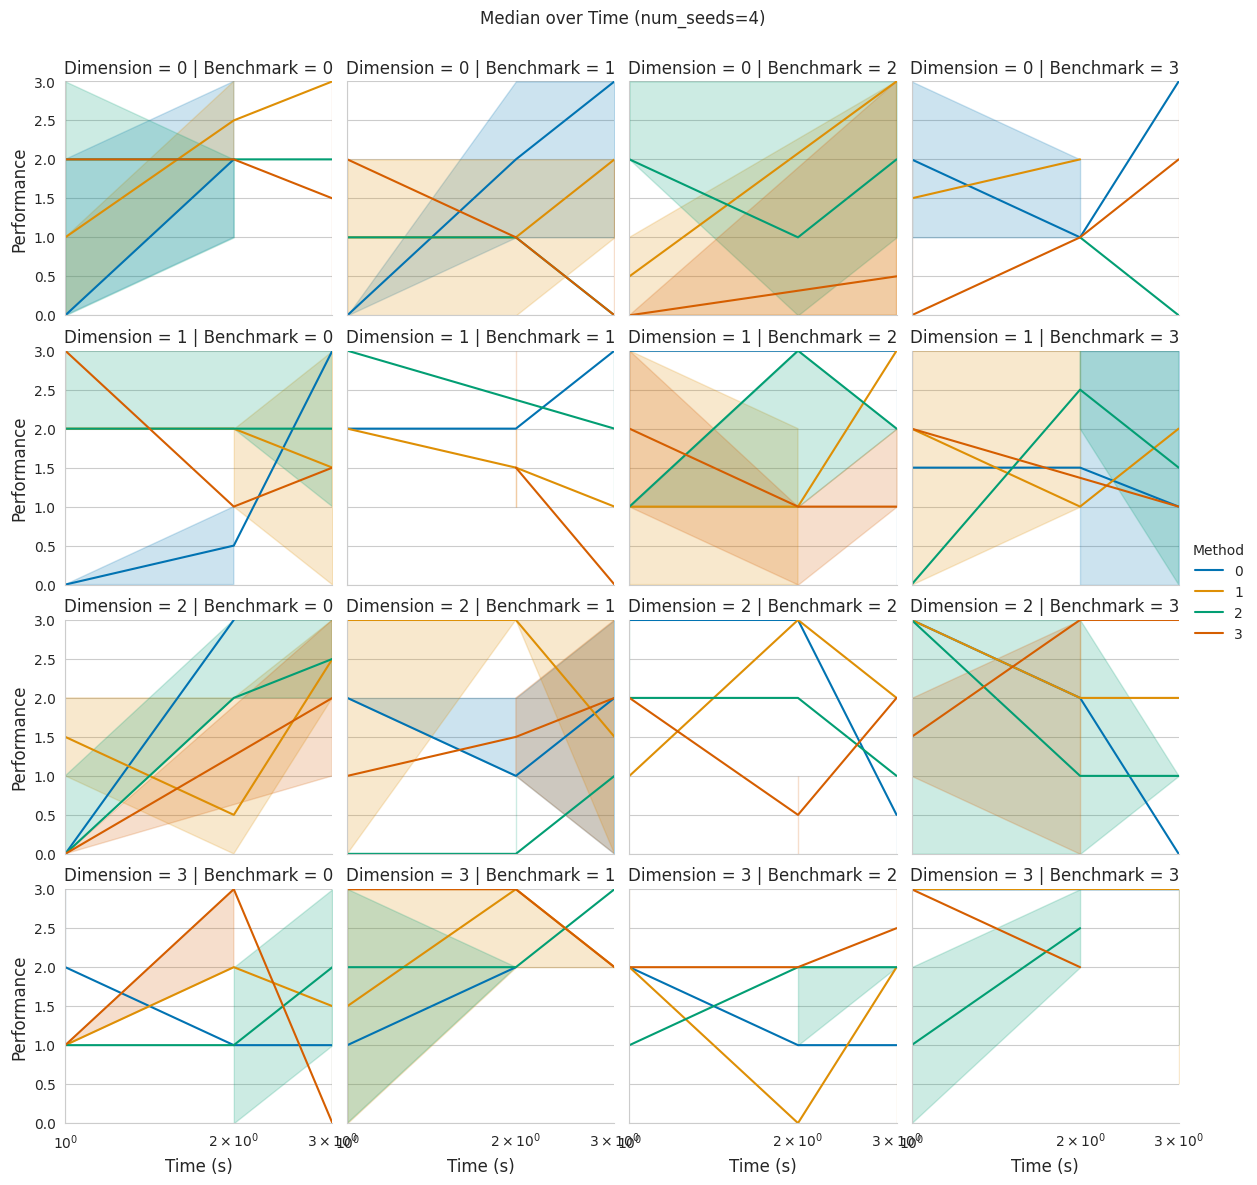

In [8]:
plot_performance_over_time(df, "time", "performance", aggregation="median", col="Benchmark", row="Dimension", hue="Method", logx=True, xlabel="Time (s)", ylabel="Performance")
print("Multiplot with col and row")

# Multiprocessing for Many Plots

If grids take too long for your data, you can instead use multiprocessing to parallelize them. Here's an example with a similar result as above:

In [9]:
processes = 4
data_splits = []
for dim in df["Dimension"].unique():
    for bench in df["Benchmark"].unique():
        data_splits.append(df[(df["Dimension"] == dim) & (df["Benchmark"] == bench)])
with mp.Pool(processes=processes) as pool:
    images = [pool.apply(plot_performance_over_time, kwds={"data":df, "x": "time", "y": "performance", "aggregation": "iqm", "hue": "Method"}) for df in data_splits]

/home/micha/Studium/BA_new/BA-Parameter-Free-DAC/ba_parameter_free_dac/plotting/plotting.py:200: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.lineplot(data=data, x=x, y=y, ax=ax, marker=marker, hue=hue, errorbar=errorbar, estimator=aggregation,palette=sns.color_palette('colorblind', as_cmap = True))
/home/micha/anaconda3/envs/PFDAC/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/micha/anaconda3/envs/PFDAC/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/micha/Studium/BA_new/BA-Parameter-Free-DAC/ba_parameter_free_d

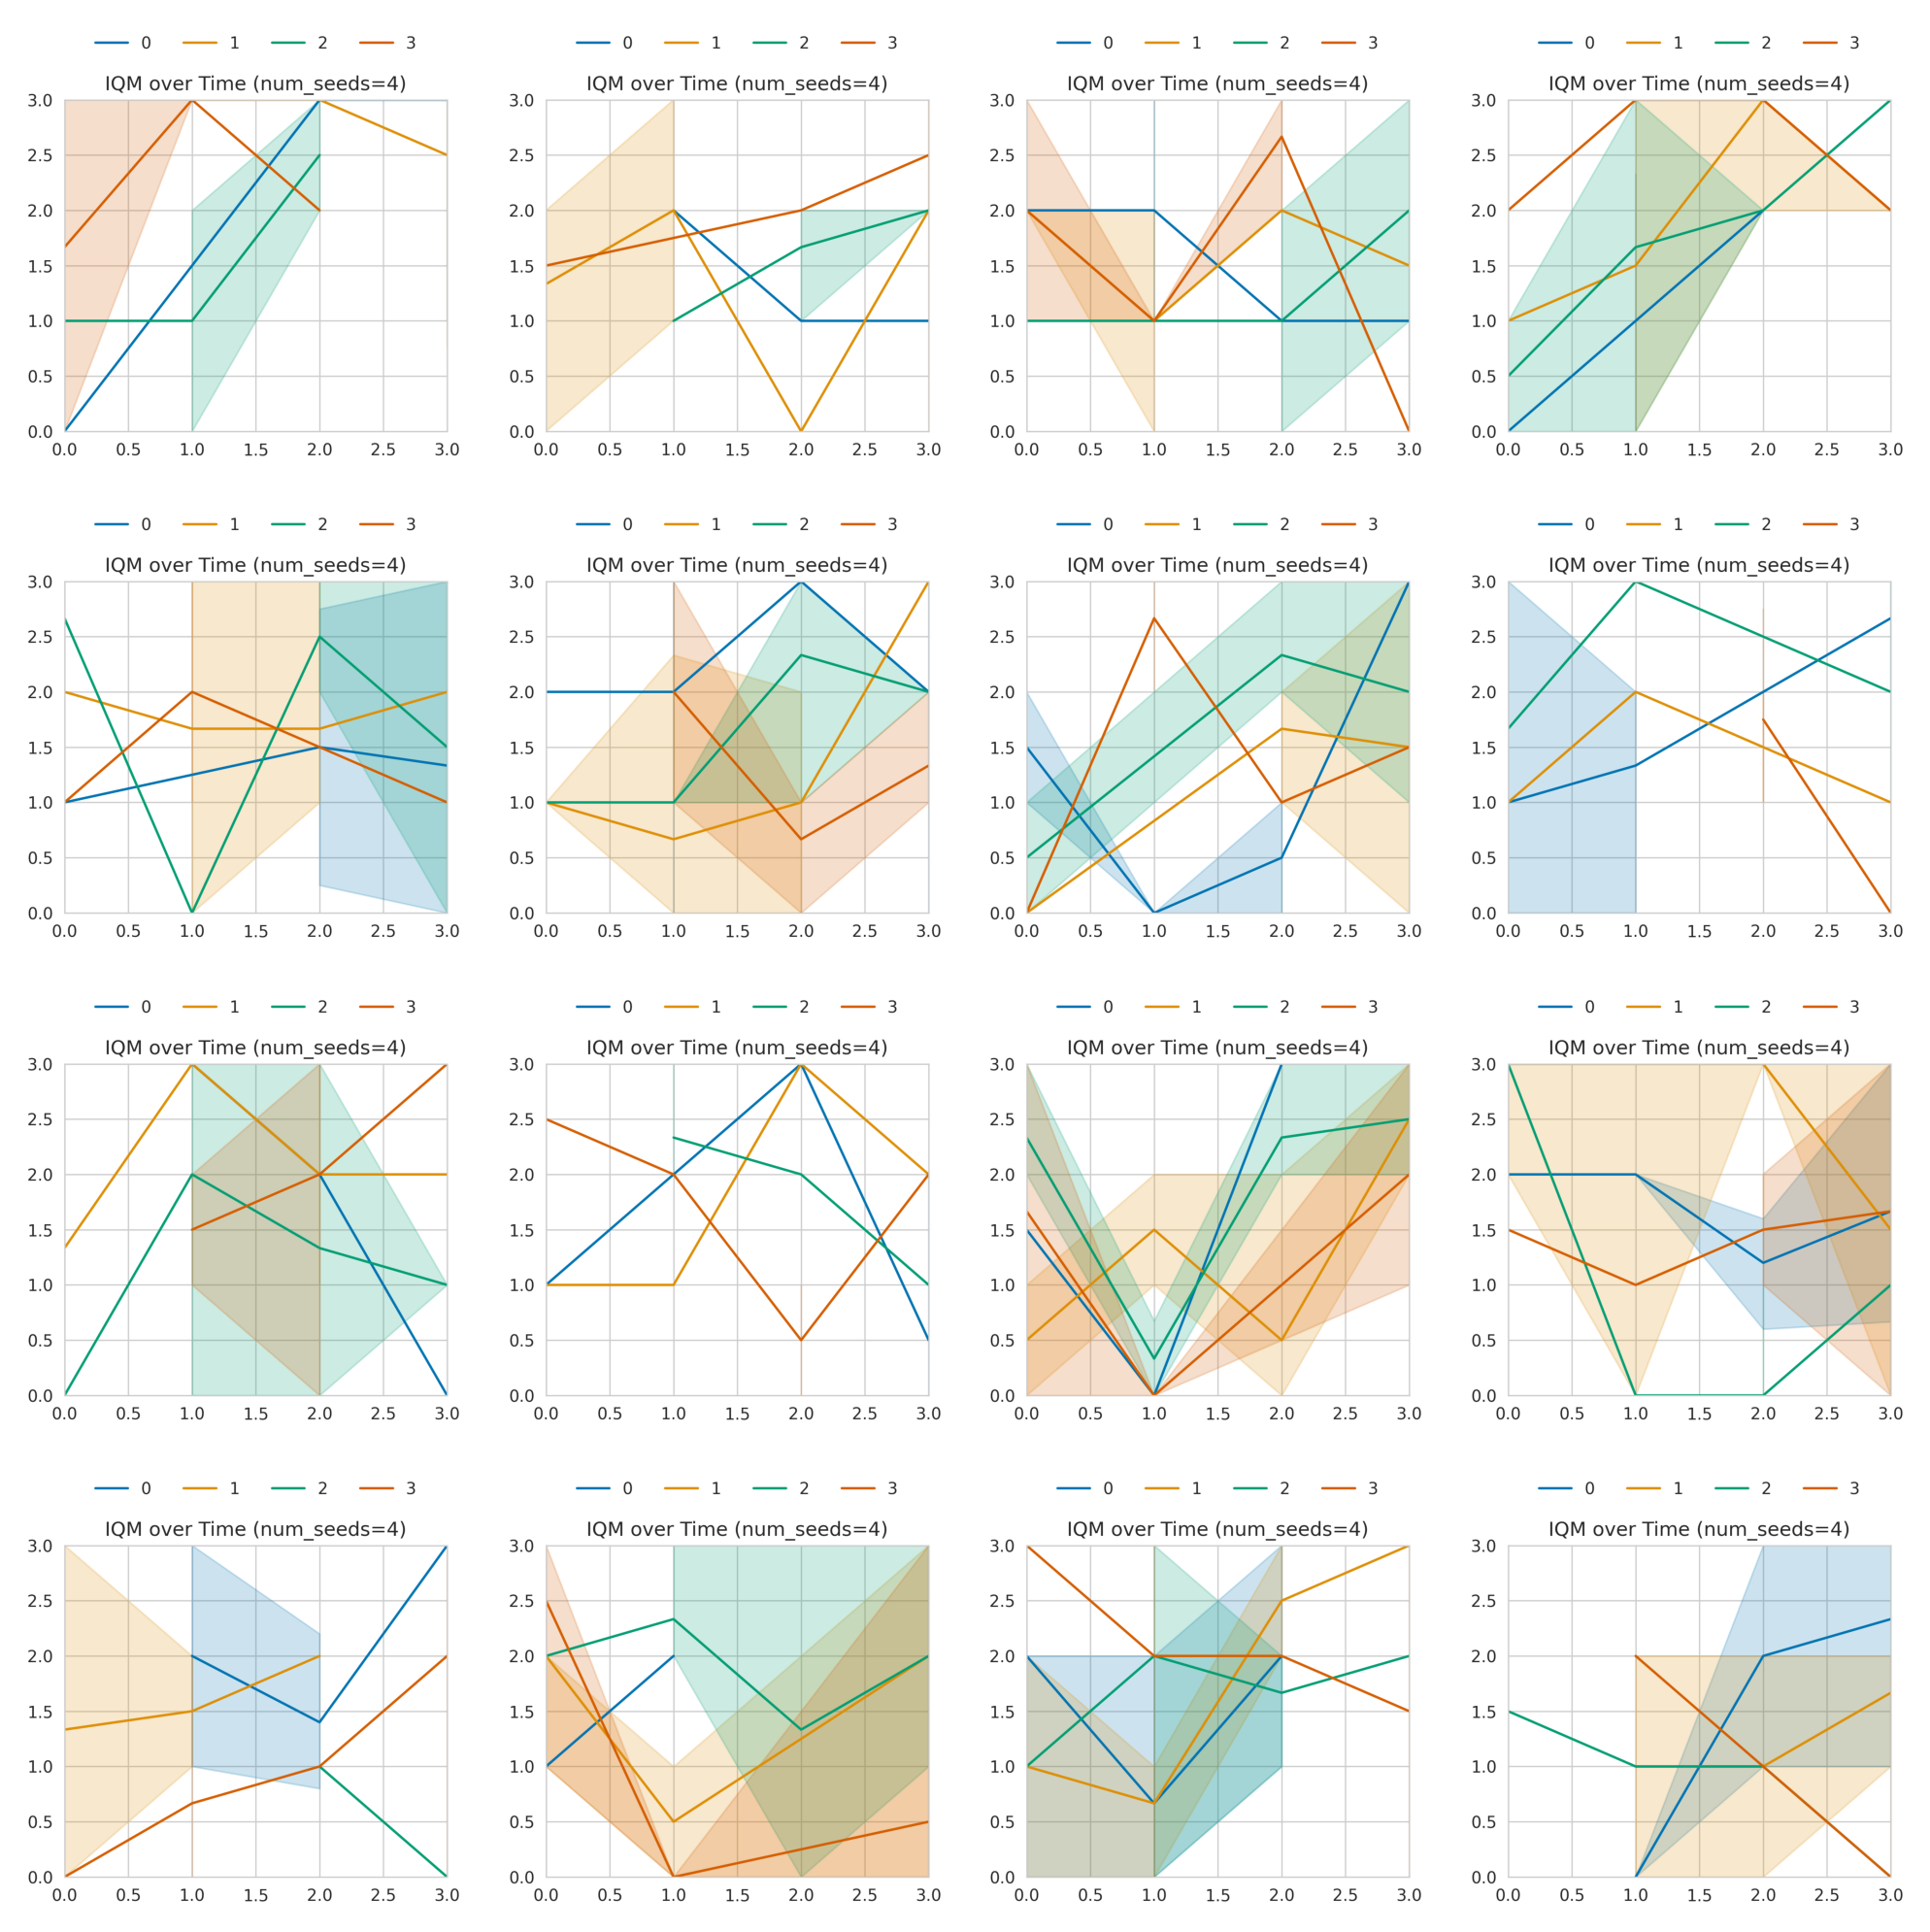

In [10]:
# Now we have to recompose the image
rows = len(df["Dimension"].unique())
columns = len(df["Benchmark"].unique())
fig = plt.figure(figsize=(20, 20))
for i, img in enumerate(images):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
    plt.axis('off')
fig.tight_layout()
plt.show()